
<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to make a good solution for the active competition on kaggle: https://www.kaggle.com/c/nlp-getting-started/data

<font color = 'Orange' size = 3 > In order to download the Datasets you will need to join and accept the terms and conditions of the competition. </font>

You need to report the parameters for the best three models into a table that will contain the model architecture and F1 score.
</font>

<font color = 'Blue' size = 4 > Structure of the Dataset </font>

<font color = 'Orange' size = 3>
The Dataset it's divided on two parts for training and testing. For the testing part you need to map the id's with the sample_submission.csv, where the target column is located.</li>
</font>

<font color = 'Blue' size = 4 >FIRST PART</font>

<font color = 'Orange' size = 3 > Choose a model that you will use from the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification [Hugging Face](https://huggingface.co/transformers/quicktour.html). 

Report the following parameters for models based on Transformers</font>
<ul>
<font color='orange'>
<li> Pretrained model</li>

<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>F1 score for the prediction of the test part (this is the metric for rating the models)
</li>
</ul>
<font color = 'Blue' size = 4 >SECOND PART</font>
<ul>
<font color='Orange'>
Cluster the tweets based on their embeddings using one of the clustering algorithms:

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>

</ul>

</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

In [2]:
import pandas as pd

test = pd.read_csv('/content/drive/MyDrive/VNP/test.csv')
train = pd.read_csv('/content/drive/MyDrive/VNP/train.csv')
target = pd.read_csv('/content/drive/MyDrive/VNP/sample_submission.csv')

In [3]:
test = pd.merge(test, target, on="id")
test

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,0
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,0


In [4]:
train_copy=train.copy()
X_train=train_copy.drop(['target'], axis = 1)
X_train=X_train['text']
Y_train=train['target']

In [5]:
test_copy=test.copy()
X_test=test_copy.drop(['target'], axis = 1)
X_test=X_test['text']
Y_test=test['target']

In [6]:
X_train

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [7]:
Y_train

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [8]:
X_test

0                      Just happened a terrible car crash
1       Heard about #earthquake is different cities, s...
2       there is a forest fire at spot pond, geese are...
3                Apocalypse lighting. #Spokane #wildfires
4           Typhoon Soudelor kills 28 in China and Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane. My city...
3260    Green Line derailment in Chicago http://t.co/U...
3261    MEG issues Hazardous Weather Outlook (HWO) htt...
3262    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 3263, dtype: object

In [9]:
Y_test

0       0
1       0
2       0
3       0
4       0
       ..
3258    0
3259    0
3260    0
3261    0
3262    0
Name: target, Length: 3263, dtype: int64

In [10]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X_train))

In [11]:
X_train = tokenizer.texts_to_sequences(X_train)
X_train

[[119, 4633, 24, 4, 868, 8, 21, 263, 138, 1619, 4634, 89, 40],
 [189, 45, 229, 799, 6954, 6955, 1404],
 [40,
  1751,
  1620,
  7,
  6956,
  6,
  6957,
  24,
  136,
  6958,
  20,
  1752,
  39,
  441,
  256,
  57,
  2158,
  6,
  714,
  1405,
  24,
  1106],
 [835, 2921, 59, 4635, 1500, 256, 1405, 6, 96],
 [34, 100, 1221, 21, 320, 22, 6959, 2159, 30, 271, 22, 1500, 6960, 69, 5, 187],
 [2922,
  378,
  96,
  1501,
  800,
  869,
  6,
  665,
  6961,
  563,
  7,
  1159,
  399,
  45,
  4636,
  1500],
 [218, 76, 870, 295, 1222, 836, 264, 8, 1753, 6, 6962, 1047, 2453, 1502],
 [46, 13, 230, 8, 4, 1933, 9, 10, 74, 110, 5, 45, 6, 4, 4637],
 [422, 43, 75, 256, 1304, 51, 6, 4, 594, 871, 4, 769],
 [46, 2454, 17, 4, 469, 11, 250, 7, 119, 278],
 [595, 59, 641, 22, 4, 279, 470, 35, 642],
 [872,
  564,
  2923,
  11,
  231,
  2924,
  3597,
  690,
  5,
  715,
  10,
  200,
  6,
  564,
  2923,
  60,
  175,
  10,
  321,
  71,
  60,
  175,
  10,
  321,
  71,
  6963,
  264],
 [2925, 264, 2160, 6964, 2923, 950, 57,

In [12]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test

[[34, 913, 5, 1951, 130, 92],
 [474, 56, 263, 11, 1201, 2648, 605, 2321, 245],
 [77,
  11,
  5,
  189,
  45,
  19,
  825,
  3575,
  24,
  5167,
  871,
  4,
  769,
  10,
  1414,
  505,
  97,
  40],
 [479, 3939, 7668, 1500],
 [217, 795, 477, 2564, 6, 942, 9, 1206],
 [814, 4422, 68, 43, 263],
 [3106, 790, 84, 432, 54, 131, 79, 2682, 155, 1790, 3680, 3680],
 [746, 64, 24, 14],
 [60, 5, 1252, 767],
 [410, 99],
 [39, 10, 70, 28, 1190],
 [70, 71, 17],
 [39, 70, 718, 32, 17],
 [60, 48],
 [1048],
 [6278,
  2928,
  557,
  11,
  643,
  901,
  58,
  45,
  3822,
  38,
  19,
  11720,
  2928,
  557,
  3,
  1,
  2],
 [42, 14, 3602, 17965, 12, 3226, 643],
 [817, 3010, 1100, 430, 643, 3, 1, 2],
 [280,
  258,
  38,
  3,
  1,
  2,
  4646,
  3,
  1,
  2,
  4647,
  3,
  1,
  2,
  4648,
  3,
  1,
  2,
  4649,
  2929],
 [5711, 2392, 15, 892, 643, 2, 892, 643],
 [4485, 112, 643, 29],
 [90, 104, 643, 20, 3, 1, 2, 53],
 [36,
  5,
  3123,
  580,
  59,
  42,
  174,
  98,
  475,
  9,
  291,
  16,
  18,
  1694,
  68

In [13]:
from keras.preprocessing import sequence
from keras.utils import pad_sequences

X_train = pad_sequences(X_train, maxlen=150)
X_test = pad_sequences(X_test, maxlen=150)

In [14]:
X_train.shape

(7613, 150)

In [15]:
X_test.shape

(3263, 150)

In [16]:
classes_num = train['target'].nunique()
classes_num

2

In [17]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, Flatten
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# First Model

In [18]:
K.clear_session()
model = Sequential()
model.add(Embedding(20000, 150, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')) 
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')) 
model.add(MaxPooling1D(pool_size=2))     
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dense(classes_num, activation='linear'))

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy']) 

In [20]:
model_history = model.fit(X_train, Y_train,  epochs=20, batch_size=138, verbose=2, validation_split=0.2) 

Epoch 1/20
45/45 - 23s - loss: 3.7050 - accuracy: 0.5787 - val_loss: 3.9364 - val_accuracy: 0.5345 - 23s/epoch - 512ms/step
Epoch 2/20
45/45 - 7s - loss: 3.5766 - accuracy: 0.5793 - val_loss: 3.9319 - val_accuracy: 0.5345 - 7s/epoch - 154ms/step
Epoch 3/20
45/45 - 7s - loss: 3.5694 - accuracy: 0.5793 - val_loss: 3.9271 - val_accuracy: 0.5345 - 7s/epoch - 159ms/step
Epoch 4/20
45/45 - 9s - loss: 3.5565 - accuracy: 0.5793 - val_loss: 3.9140 - val_accuracy: 0.5345 - 9s/epoch - 207ms/step
Epoch 5/20
45/45 - 12s - loss: 3.5338 - accuracy: 0.5793 - val_loss: 3.8925 - val_accuracy: 0.5345 - 12s/epoch - 267ms/step
Epoch 6/20
45/45 - 9s - loss: 3.5047 - accuracy: 0.5793 - val_loss: 3.8737 - val_accuracy: 0.5345 - 9s/epoch - 194ms/step
Epoch 7/20
45/45 - 10s - loss: 3.4852 - accuracy: 0.5793 - val_loss: 3.8730 - val_accuracy: 0.5345 - 10s/epoch - 229ms/step
Epoch 8/20
45/45 - 17s - loss: 3.4689 - accuracy: 0.5793 - val_loss: 3.8571 - val_accuracy: 0.5345 - 17s/epoch - 385ms/step
Epoch 9/20
45/45

In [21]:
import numpy as np

y_pred=model.predict(X_test) 
classes_y=np.argmax(y_pred,axis=1)

102/102 [==============================] - 2s 12ms/step


In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, classes_y,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.38      0.56      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.38      3263
   macro avg       0.50      0.19      0.28      3263
weighted avg       1.00      0.38      0.56      3263



# Second model

In [23]:
K.clear_session()
model = Sequential()
model.add(Embedding(20000, 150, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='sigmoid')) 
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='sigmoid')) 
model.add(MaxPooling1D(pool_size=2))     
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dense(classes_num, activation='linear'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [25]:
model_history = model.fit(X_train, Y_train,  epochs=20, batch_size=130, verbose=2, validation_split=0.2) 

Epoch 1/20
47/47 - 12s - loss: 0.7404 - accuracy: 0.4857 - val_loss: 0.6908 - val_accuracy: 0.5345 - 12s/epoch - 257ms/step
Epoch 2/20
47/47 - 7s - loss: 0.6819 - accuracy: 0.4921 - val_loss: 0.6900 - val_accuracy: 0.4655 - 7s/epoch - 158ms/step
Epoch 3/20
47/47 - 7s - loss: 0.6784 - accuracy: 0.4908 - val_loss: 0.6887 - val_accuracy: 0.5345 - 7s/epoch - 154ms/step
Epoch 4/20
47/47 - 8s - loss: 0.6516 - accuracy: 0.4534 - val_loss: 0.6312 - val_accuracy: 0.2817 - 8s/epoch - 160ms/step
Epoch 5/20
47/47 - 7s - loss: 0.5081 - accuracy: 0.3985 - val_loss: 0.6118 - val_accuracy: 0.4655 - 7s/epoch - 158ms/step
Epoch 6/20
47/47 - 7s - loss: 0.4008 - accuracy: 0.6453 - val_loss: 0.5691 - val_accuracy: 0.4655 - 7s/epoch - 156ms/step
Epoch 7/20
47/47 - 7s - loss: 0.3012 - accuracy: 0.3816 - val_loss: 0.6356 - val_accuracy: 0.5345 - 7s/epoch - 157ms/step
Epoch 8/20
47/47 - 8s - loss: 0.1994 - accuracy: 0.4588 - val_loss: 0.8892 - val_accuracy: 0.3880 - 8s/epoch - 165ms/step
Epoch 9/20
47/47 - 7s 

In [26]:
y_pred=model.predict(X_test) 
classes_y=np.argmax(y_pred,axis=1)

102/102 [==============================] - 1s 11ms/step


In [27]:
print(classification_report(Y_test, classes_y,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.56      3263
   macro avg       0.50      0.28      0.36      3263
weighted avg       1.00      0.56      0.72      3263



# Third model

In [28]:
K.clear_session()
model = Sequential()
model.add(Embedding(20000, 150, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')) 
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')) 
model.add(MaxPooling1D(pool_size=2))     
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) 
model.add(Dense(classes_num, activation='linear'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy']) 

In [30]:
model_history = model.fit(X_train, Y_train,  epochs=20, batch_size=150, verbose=2, validation_split=0.2) 

Epoch 1/20
41/41 - 10s - loss: 1.4933 - accuracy: 0.4207 - val_loss: 1.0835 - val_accuracy: 0.4655 - 10s/epoch - 234ms/step
Epoch 2/20
41/41 - 6s - loss: 0.9053 - accuracy: 0.4207 - val_loss: 0.8965 - val_accuracy: 0.4655 - 6s/epoch - 155ms/step
Epoch 3/20
41/41 - 6s - loss: 0.7829 - accuracy: 0.4207 - val_loss: 0.7866 - val_accuracy: 0.4655 - 6s/epoch - 156ms/step
Epoch 4/20
41/41 - 7s - loss: 0.7181 - accuracy: 0.4207 - val_loss: 0.7311 - val_accuracy: 0.4655 - 7s/epoch - 159ms/step
Epoch 5/20
41/41 - 8s - loss: 0.6926 - accuracy: 0.4205 - val_loss: 0.7088 - val_accuracy: 0.4655 - 8s/epoch - 204ms/step
Epoch 6/20
41/41 - 6s - loss: 0.6854 - accuracy: 0.4205 - val_loss: 0.7017 - val_accuracy: 0.4655 - 6s/epoch - 158ms/step
Epoch 7/20
41/41 - 6s - loss: 0.6834 - accuracy: 0.4209 - val_loss: 0.6997 - val_accuracy: 0.4655 - 6s/epoch - 156ms/step
Epoch 8/20
41/41 - 7s - loss: 0.6839 - accuracy: 0.4217 - val_loss: 0.6989 - val_accuracy: 0.4655 - 7s/epoch - 164ms/step
Epoch 9/20
41/41 - 6s 

In [31]:
y_pred=model.predict(X_test) 
classes_y=np.argmax(y_pred,axis=1)

102/102 [==============================] - 1s 12ms/step


In [32]:
print(classification_report(Y_test, classes_y,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47      3263
           1       0.00      0.00      0.00         0

    accuracy                           0.31      3263
   macro avg       0.50      0.16      0.24      3263
weighted avg       1.00      0.31      0.47      3263



# Comparison of models

In [33]:
num_model = [1,2,3]
num_layers = [7, 7, 7]
type_layers = ['Embedding, Conv1D, MaxPooling1D, LSTM, Dense', 'Embedding, Conv1D, MaxPooling1D, LSTM, Dense', 'Embedding, Conv1D, MaxPooling1D, LSTM, Dense']
activation = ['relu', 'sigmoid', 'relu']
loss = ['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy']
optimizer = ['adamax', 'adam', 'adagrad']
epochs = [20, 20, 20]
batch = [138, 130, 150]
r2 = [0.1, 1.00 ,0.70]

matrix = []
for i in range(0, 3):
  matrix.append([num_model[i], num_layers[i], type_layers[i], activation[i], epochs[i], batch[i], loss[i], optimizer[i], r2[i]])
df = pd.DataFrame(np.array(matrix), columns=['Model', 'Number of Layers', 'Types of layers', 'Activation function', 'Number of Epochs', 'Batch size', 'Loss function', 'Optimizer function', 'R2 score'])
df

,Model,Number of Layers,Types of layers,Activation function,Number of Epochs,Batch size,Loss function,Optimizer function,R2 score
0,1,7,"Embedding, Conv1D, MaxPooling1D, LSTM, Dense",relu,20,138,binary_crossentropy,adamax,0.1
1,2,7,"Embedding, Conv1D, MaxPooling1D, LSTM, Dense",sigmoid,20,130,binary_crossentropy,adam,1.0
2,3,7,"Embedding, Conv1D, MaxPooling1D, LSTM, Dense",relu,20,150,binary_crossentropy,adagrad,0.7


# FIRST PART

In [34]:
# Choose a model that you will use from the pretrained BERT, RoBERTa, XLNet, XLM ... models for Text Classification Hugging Face.
#
#Report the following parameters for models based on Transformers
#
#    Pretrained model
#    Loss function
#    Optimizer function for compiling
#    F1 score for the prediction of the test part (this is the metric for rating the models)

In [35]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.8 MB/s eta 0:00:00


In [36]:
pip install pytorch_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 65.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.6 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=e5107b7ecb67dffdf217eb507496d8fb17f63110dea7082a3fd06dee349857a7
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremose

In [37]:
from sklearn.model_selection import train_test_split

X_tr2, X_vl2, y_tr2, y_vl2 = train_test_split(train.index.values, train.target.values, test_size=0.2, random_state=42, stratify=train.target.values)

In [38]:
train['data_type'] = ['not_set']*train.shape[0]
train.loc[X_tr2, 'data_type'] = 'train'
train.loc[X_vl2, 'data_type'] = 'val'

In [39]:
train.groupby(['target', 'data_type']).count()

id  keyword  location  text
target data_type                               
0      train      3473     3457      2325  3473
       val         869      866       559   869
1      train      2617     2585      1757  2617
       val         654      644       439   654

In [40]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case=True
)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [41]:
import torch

In [42]:
encoded_data_train = tokenizer.batch_encode_plus(
    train[train.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

In [43]:
encoded_data_val = tokenizer.batch_encode_plus(
    train[train.data_type=='val'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    padding='max_length',
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

In [44]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train[train.data_type=='train'].target.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(train[train.data_type=='val'].target.values)

In [45]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [46]:
from transformers import BertForSequenceClassification

label_dict = {}
possible_labels = train.target.unique()

for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [47]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = len(label_dict), output_attentions = False, output_hidden_states = False)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [48]:
batch_size = 5
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
dataloader_train = DataLoader(dataset_train, sampler=RandomSampler(dataset_train), batch_size=batch_size)
dataloader_val = DataLoader(dataset_val,sampler=RandomSampler(dataset_val),batch_size=32)

In [49]:
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),lr = 1e-5,eps = 1e-8)
epochs = 1
scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,num_training_steps = len(dataloader_train)*epochs)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [50]:
import numpy as np
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [51]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [52]:
def evaluate(dataloader_val):
    model.eval()
    loss_val_total = 0
    predictions, true_vals = [], []
    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }
        with torch.no_grad():        
            outputs = model(**inputs)    
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    loss_val_avg = loss_val_total/len(dataloader_val) 
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
    return loss_val_avg, predictions, true_vals

In [53]:
from tqdm.notebook import tqdm

for epoch in tqdm(range(1, epochs+1)):
    model.train()
    loss_train_total = 0 
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }
        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total +=loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    print(f'Validation loss: {val_loss}')
    print(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1218 [00:00<?, ?it/s]

Training loss: 0.4770546785482375


  0%|          | 0/48 [00:00<?, ?it/s]

Validation loss: 0.4198697571021815
F1 Score (weighted): 0.8458175018103213


# SECOND PART

In [54]:
# Cluster the tweets based on their embeddings using one of the clustering algorithms:
# K-Means Clustering
# Agglomerative Clustering
# Affinity propagation Clustering
# Spectral Clustering
# DBSCAN Clustering

In [105]:
train_copy=train.copy()
X_train=train_copy.drop(['target'], axis = 1)
X_train=X_train['text']
Y_train=train['target']

test_copy=test.copy()
X_test=test_copy.drop(['target'], axis = 1)
X_test=X_test['text']
Y_test=test['target']

X = pd.concat([X_train,X_test],axis=0)
Y = pd.concat([Y_train,Y_test],axis=0)

In [106]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X))

X = tokenizer.texts_to_sequences(X)
X

[[114, 5944, 24, 4, 850, 8, 21, 253, 151, 1820, 3841, 88, 41],
 [168, 43, 212, 927, 8813, 8814, 1442],
 [41,
  1600,
  1515,
  6,
  8815,
  7,
  5945,
  24,
  143,
  8816,
  19,
  1821,
  39,
  297,
  277,
  57,
  2277,
  7,
  789,
  1700,
  24,
  1263],
 [766, 2832, 61, 4625, 1370, 277, 1700, 7, 110],
 [32, 102, 1516, 21, 291, 23, 5946, 2544, 30, 282, 23, 1370, 8817, 70, 5, 208],
 [3255,
  415,
  110,
  1961,
  851,
  897,
  7,
  811,
  8818,
  416,
  6,
  1264,
  417,
  43,
  5947,
  1370],
 [209, 76, 928, 305, 1120, 898, 318, 8, 1822, 7, 8819, 1121, 2833, 1701],
 [46, 13, 225, 8, 4, 2114, 9, 10, 72, 111, 5, 43, 7, 4, 4626],
 [516, 44, 75, 277, 1265, 56, 7, 4, 586, 899, 4, 705],
 [46, 2278, 18, 4, 552, 11, 254, 6, 114, 340],
 [489, 61, 539, 23, 4, 283, 454, 36, 587],
 [929,
  588,
  2834,
  11,
  245,
  2835,
  4627,
  688,
  5,
  767,
  10,
  193,
  7,
  588,
  2834,
  64,
  191,
  10,
  284,
  69,
  64,
  191,
  10,
  284,
  69,
  8820,
  318],
 [3842, 318, 2115, 8821, 2834, 965, 5

In [108]:
from keras.preprocessing import sequence
from keras.utils import pad_sequences

X = pad_sequences(X, maxlen=150)

In [109]:
X.shape

(10876, 150)

In [110]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
3258    0
3259    0
3260    0
3261    0
3262    0
Name: target, Length: 10876, dtype: int64

In [111]:
Y.shape

(10876,)

In [112]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

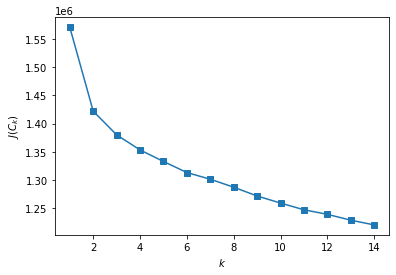

In [114]:
plt.plot(range(1, 15), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [115]:
from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering,DBSCAN
algorithms = []
algorithms.append(KMeans(n_clusters=4, random_state=1))
algorithms.append(SpectralClustering(n_clusters=4, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=4))
algorithms.append(AffinityPropagation())
algorithms.append(DBSCAN())
data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(Y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(Y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(Y, algo.labels_),
        'Completeness': metrics.completeness_score(Y, algo.labels_),
        'V-measure': metrics.v_measure_score(Y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure'],
                       index=['K-means', 'Spectral', 'Agglomerative', 
                              'Affinity', 'DBSCAN'])

results

,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.136338,0.048087,0.062583,0.039262,0.048252
Spectral,0.088969,0.049207,0.056541,0.043856,0.049397
Agglomerative,0.101468,0.038313,0.057129,0.028986,0.038459
Affinity,0.005032,0.019561,0.179862,0.020140,0.036223
DBSCAN,0.011634,0.012696,0.010664,0.038564,0.016708


In [116]:
#Najdobri rezultati ima algoritmot Spectral Clustering

from sklearn.decomposition import PCA
data = X
pca = PCA(2)
df_transformed = pca.fit_transform(data)

In [117]:
model = SpectralClustering(n_clusters=4, random_state=1, affinity='nearest_neighbors').fit(df_transformed)

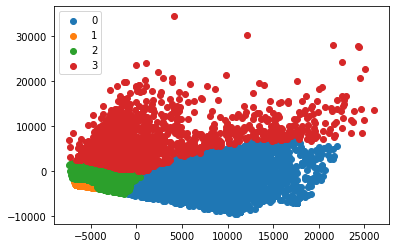

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

label = model.fit_predict(df_transformed)
unique_labels = np.unique(label)
for i in unique_labels:
    plt.scatter(df_transformed[label == i , 0] , df_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()